/var/folders/jx/0ys8f9nd3sq2drdp1r_nygfw0000gn/T/ipykernel_1995/721587843.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x="Region", palette="viridis")


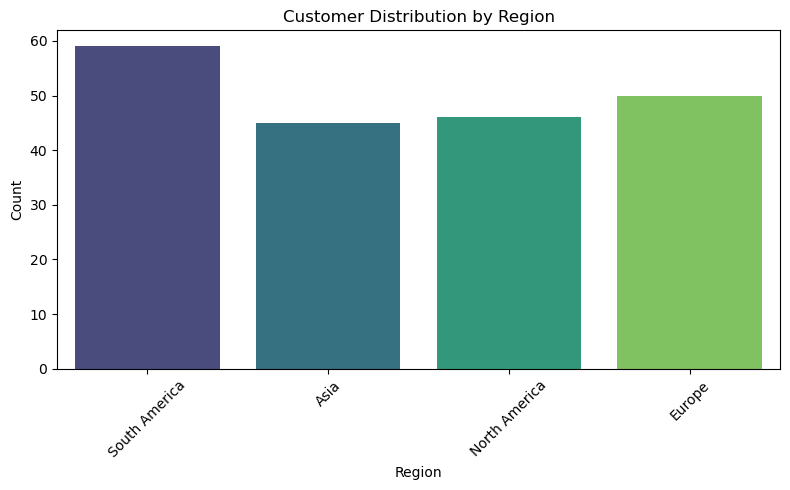

/var/folders/jx/0ys8f9nd3sq2drdp1r_nygfw0000gn/T/ipykernel_1995/721587843.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, x="Category", palette="cubehelix")


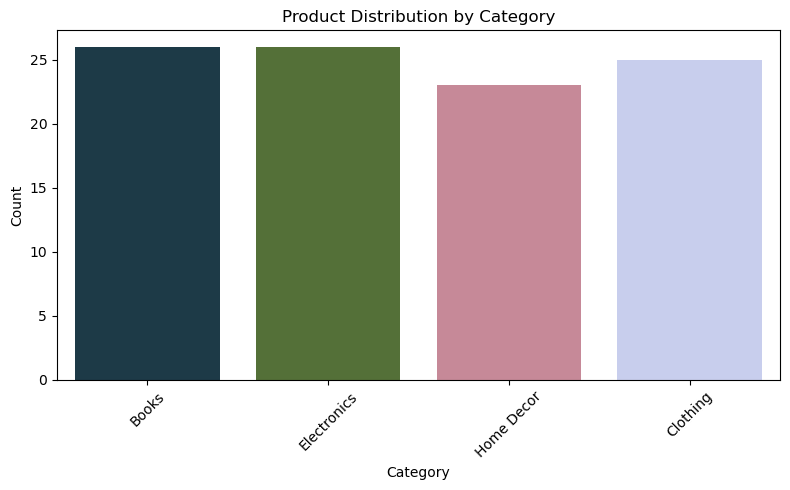

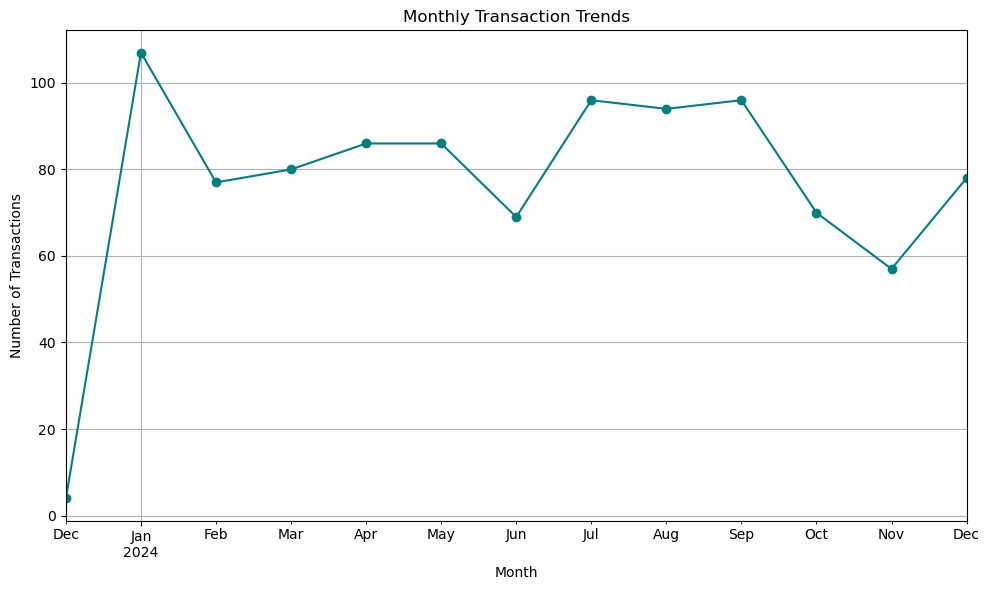

/var/folders/jx/0ys8f9nd3sq2drdp1r_nygfw0000gn/T/ipykernel_1995/721587843.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y="ProductName", x="TotalValue", palette="coolwarm")


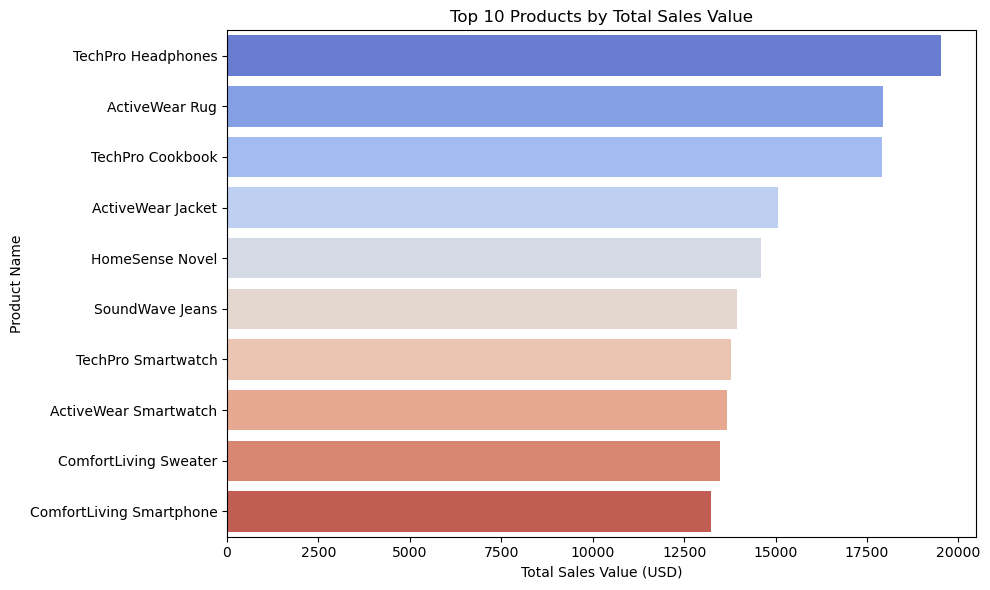

/var/folders/jx/0ys8f9nd3sq2drdp1r_nygfw0000gn/T/ipykernel_1995/721587843.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_spending, x="Region", y="TotalValue", palette="flare")


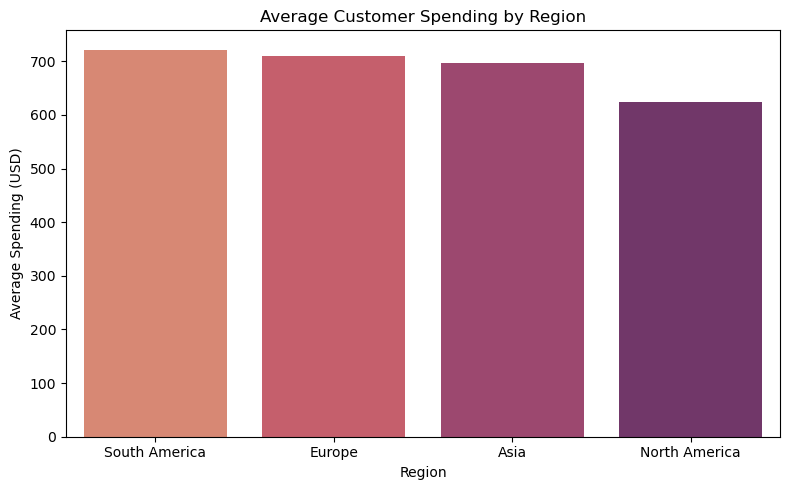

In [4]:
# Exploratory Data Analysis - Task 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_df = pd.read_csv('Downloads/Customers.csv')
products_df = pd.read_csv('Downloads/Products.csv')
transactions_df = pd.read_csv('Downloads/Transactions.csv')

# Convert date columns to datetime
customers_df["SignupDate"] = pd.to_datetime(customers_df["SignupDate"])
transactions_df["TransactionDate"] = pd.to_datetime(transactions_df["TransactionDate"])

# Customer Region Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=customers_df, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Product Category Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=products_df, x="Category", palette="cubehelix")
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Transaction Trends Over Time
transactions_df["TransactionMonth"] = transactions_df["TransactionDate"].dt.to_period("M")
monthly_transactions = transactions_df.groupby("TransactionMonth").size()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind="line", marker="o", color="teal")
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.tight_layout()
plt.show()

# Top 10 Products by Total Sales Value
top_products = (
    transactions_df.groupby("ProductID")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .merge(products_df, on="ProductID")
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, y="ProductName", x="TotalValue", palette="coolwarm")
plt.title("Top 10 Products by Total Sales Value")
plt.xlabel("Total Sales Value (USD)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# Average Spending by Region
region_spending = (
    transactions_df.merge(customers_df, on="CustomerID")
    .groupby("Region")["TotalValue"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8, 5))
sns.barplot(data=region_spending, x="Region", y="TotalValue", palette="flare")
plt.title("Average Customer Spending by Region")
plt.xlabel("Region")
plt.ylabel("Average Spending (USD)")
plt.tight_layout()
plt.show()
